## Problem 2.2 (Exploring fish sleep data)

In [22]:
import numpy as np
import pandas as pd
import itertools

import altair as alt
import bokeh.io

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

alt.data_transformers.enable('json')

Loading BokehJS ...

DataTransformerRegistry.enable('json')

In [6]:
df_gt = pd.read_csv('../data/130315_1A_genotypes.txt',
                    delimiter='\t',
                    comment='#',
                    header=[0, 1])
# Take a look
df_gt.head()

,Genotype1,Genotype2,Genotype3
,WT 17,Het 34,Mut 22
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0


In [7]:
# Reset the columns to be the second level of indexing
df_gt.columns = df_gt.columns.get_level_values(1)

# Check out the new columns
df_gt.columns

Index(['WT 17', 'Het 34', 'Mut 22'], dtype='object')

In [8]:
df_gt.columns = ['wt', 'het', 'mut']


In [9]:
# Tidy the DataFrame
df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

# Take a look
df_gt

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [10]:
# Drop all rows that have a NaN in them
df_gt = df_gt.dropna()

# Take a look
df_gt

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [11]:
df_gt = df_gt.reset_index(drop=True)


In [12]:
df_gt.loc[:,'location'] = df_gt.loc[:, 'location'].astype(int)


In [13]:
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [14]:
df = pd.merge(df, df_gt)

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het


In [15]:
df['time'] = pd.to_datetime(df['time'])

In [16]:
df['time'].dt.time.head()

0    18:31:09
1    18:32:09
2    18:33:09
3    18:34:09
4    18:35:09
Name: time, dtype: object

In [17]:
df['light'] = (  (df['time'].dt.time >= pd.to_datetime('9:00:00').time())
               & (df['time'].dt.time < pd.to_datetime('23:00:00').time()))

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True


In [26]:
inds = df['day'] == 5

In [31]:
# Calculate the median activity for each genotype 

median_df = df.groupby(['genotype', 'zeit_ind']).median().reset_index()

del median_df['location']

In [32]:
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light
0,het,-869,0.0,-14.480833,4,True
1,het,-868,0.0,-14.464167,4,True
2,het,-867,0.0,-14.447500,4,True
3,het,-866,0.0,-14.430833,4,True
4,het,-865,0.0,-14.414167,4,True


In [33]:
# define a function that use the condion of activity to generate a new column

def label_activity(c):
    if c['activity'] > 10:
        return'high'
    if (c['activity'] <= 10) & (c['activity'] > 0):
        return'low'
    if c['activity'] == 0:
        return'in'

In [35]:
median_df['type'] = median_df.apply(label_activity, axis = 1)
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,0.0,-14.480833,4,True,in
1,het,-868,0.0,-14.464167,4,True,in
2,het,-867,0.0,-14.447500,4,True,in
3,het,-866,0.0,-14.430833,4,True,in
4,het,-865,0.0,-14.414167,4,True,in


In [37]:
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,0.0,-14.480833,4,True,in
1,het,-868,0.0,-14.464167,4,True,in
2,het,-867,0.0,-14.447500,4,True,in
3,het,-866,0.0,-14.430833,4,True,in
4,het,-865,0.0,-14.414167,4,True,in


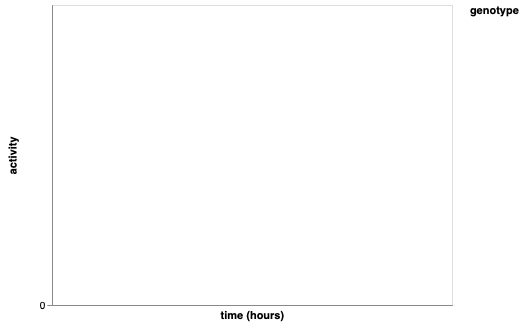

In [38]:
# Only extract the data of day5 (which is the agreement among zebrafish community)
inds = median_df['day'] == 5

alt.Chart(median_df.loc[inds,:]
    ).mark_line(
        strokeJoin='bevel'
    ).encode(
        x=alt.X('zeit:Q', title='time (hours)'),
        y='activity:Q',
        color=alt.Color('genotype:N', sort=['wt', 'het', 'mut']),
        order='zeit:Q'
    )

in the paper, they defined resting bout as below:
'Any 1 min bin with zero detectable movement was considered 1 min of rest, a rest bout was defined as a continuous string of rest minutes'
And we decide to defined a sleep bout as 3 minutes of resting minutes

In [51]:
# Create GroupBy object
grouped = df.groupby('genotype')['zeit_ind', 'activity']

# Make a RollingGroupby with window size of 3.
rolling = grouped.rolling(window=2, on='zeit_ind')

# Look at rolling object
rolling

RollingGroupby [window=2,center=False,axis=0,on=zeit_ind]

In [52]:
df_rolling = rolling.sum()

# Take a look
df_rolling.head(n=20)

zeit_ind      activity
genotype                           
het      0       -869           NaN
         1       -868  2.500000e+00
         2       -867  3.800000e+00
         3       -866  1.530000e+01
         4       -865  2.880000e+01
         5       -864  2.810000e+01
         6       -863  2.410000e+01
         7       -862  2.300000e+01
         8       -861  2.000000e+01
         9       -860  1.160000e+01
         10      -859  4.500000e+00
         11      -858  1.300000e+00
         12      -857  6.883383e-15
         13      -856  6.883383e-15
         14      -855  6.883383e-15
         15      -854  6.883383e-15
         16      -853  6.883383e-15
         17      -852  6.883383e-15
         18      -851  6.883383e-15
         19      -850  6.883383e-15

In [47]:
# Resample with summing
activity_resampled = resampler.sum()['activity']

# Rescale sum with count
activity_resampled *= 3 / resampler.count()['activity']

# Reset the index
activity_resampled = activity_resampled.reset_index()

# Take a look
activity_resampled.head()

,genotype,time,activity
0,het,2013-03-15 18:30:00,5.188235
1,het,2013-03-15 18:33:00,5.505882
2,het,2013-03-15 18:36:00,5.776471
3,het,2013-03-15 18:39:00,4.152941
4,het,2013-03-15 18:42:00,2.902941
